# Переобучение

Википедия: <br>"<b>Переобучение</b> (переподгонка, пере- в значении «слишком», англ. overfitting) в машинном обучении и статистике — явление, когда построенная модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении (на примерах из тестовой выборки)."

<img src="../imgs/overfitting1.JPG" width=600>
<img src="../imgs/overfitting2.JPG" width=600>
<img src="../imgs/overfitting3.JPG" width=600>
<img src="../imgs/overfitting4.JPG" width=600>

<br>
<img src="../imgs/overfitting.png" align=left>
<img src="../imgs/overfitting2.png">

# Решающее дерево в задаче регрессии

In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeRegressor

def create_random_dataset(function):
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    
    if function == 'sin':
        y = np.sin(X).ravel()
    if function == 'piecewise':
        y = np.piecewise(X.flatten(), [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
    
    y[::2] += 1 * (0.5 - rng.rand(40))
    
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    return X, y, X_test

X, y, X_test = create_random_dataset('piecewise')

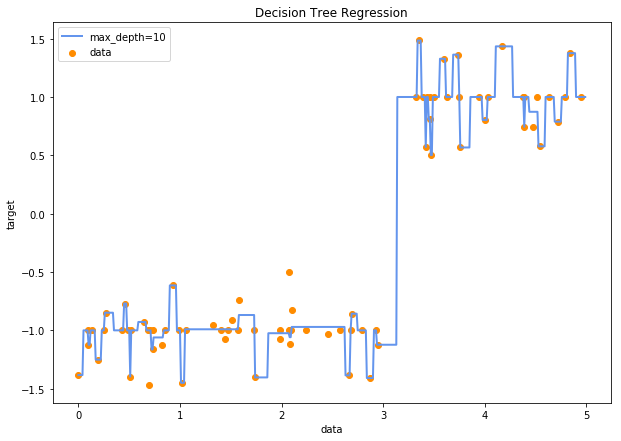

In [3]:
def fit_predict_plot(max_depth=1, mse_tree=True, mae_tree=False):
    clf = DecisionTreeRegressor(max_depth=max_depth,
                                random_state=1)
    clf.fit(X, y)
    plt.figure(figsize=(10, 7))
    plt.scatter(X, y, c="darkorange", label="data")
    y_pred = clf.predict(X_test)
    plt.plot(X_test, y_pred, color="cornflowerblue", 
             label='max_depth=' + str(max_depth), linewidth=2)
    
    if mae_tree:
        clf2 = DecisionTreeRegressor(max_depth=max_depth, 
                                     criterion='mae',
                                     random_state=1)
        clf2.fit(X, y)
        y_pred2 = clf2.predict(X_test)
        plt.plot(X_test, y_pred2, color="green", label='max_depth=' + str(max_depth), linewidth=2)
    
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    

fit_predict_plot(max_depth=10)

## Дерево можно нарисовать: 

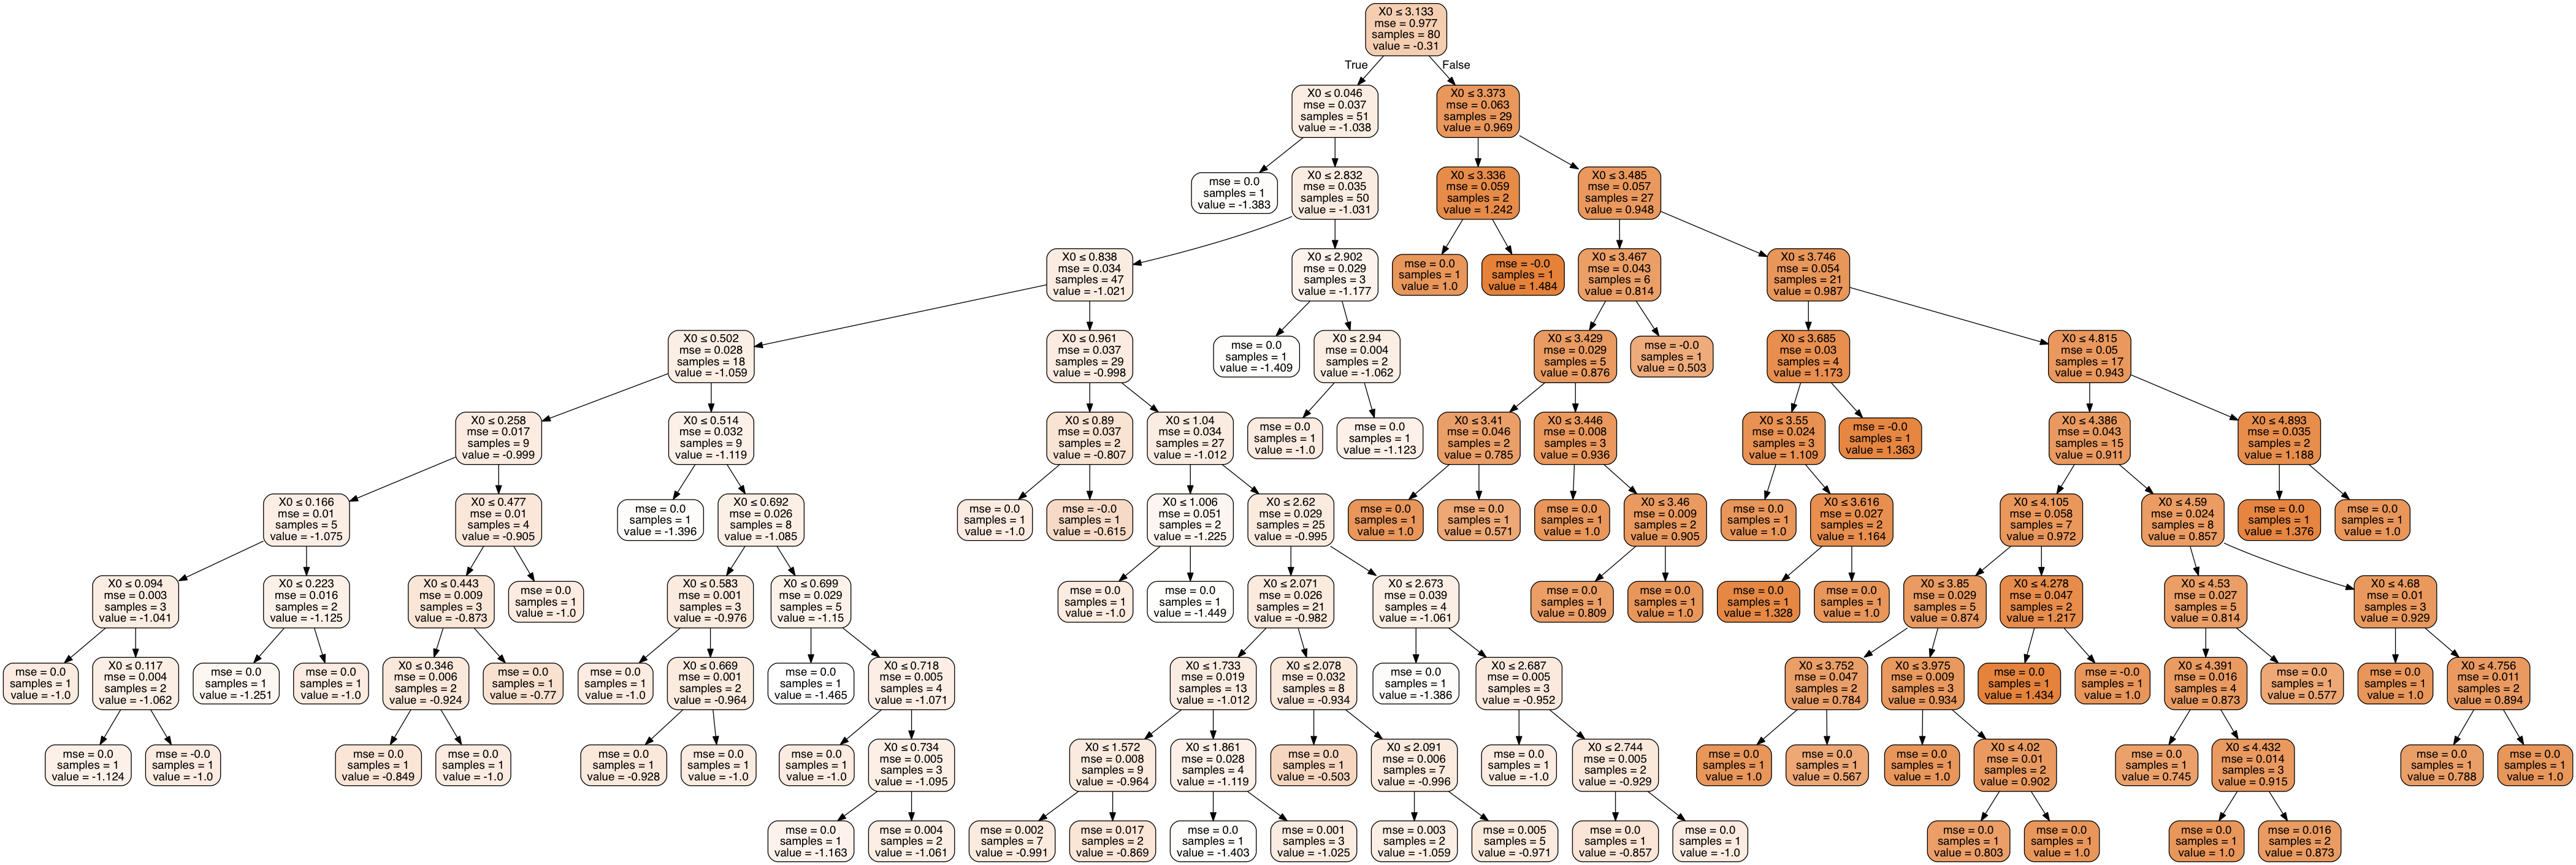

In [8]:
import pydotplus 
from IPython.display import Image
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=10)
clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                 filled=True, rounded=True,
                                 special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Выводы:
- Регулируя max_depth можно находить компромисс между underfitting и overfitting
- Дерево – это жадный алгоритм, а значит его построение и качество сильно зависит от того, удачно ли были выбраны сплиты в начале построения
- В стандартной реализации для задачи регрессии вам доступны функции MAE, MSE. Но вы можете найти реализации, где функцию ошибки можно задать произвольным образом
- Дерево – интерпретируемый алгоритм (пока оно не очень глубокое)